## Análise descritiva dos dados
### Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

**Objetivo:** Fazer uma análise descritiva para obter insights da base de dados.

**Informações do datase**

 1. Dimensão do dataset
	 - Linhas: 7000
	 - Colunas: 11
 2. Informações sobre as colunas (features)
	- 'id': Identificador do cliente;
	- 'sobrenome': Sobrenome do cliente
	- 'pontuacao_credito': Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente);
	- 'estado_residencia': Estado de residência do cliente;
	- 'genero': Gênero do cliente;
	- 'nivel_estabilidade': Nível de estabilidade do cliente;
	- 'saldo_conta': Saldo disponível na conta do cliente;
	- 'numero_produtos': Número de produtos que o cliente consome;
	- 'possui_cartao_de_credito': Possui um cartão de crédito cadastrado;
	- 'membro_ativo': Membro acessa e consome frequentemente


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Carregando os dados

In [2]:
df = pd.read_csv('desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


### 2 - Descrições Gerais preliminares dos dados

In [5]:
#Dimensão do dataframe (linhas,colunas)
df.shape

(7000, 11)

In [6]:
#Informações Gerais (colunas, quantidade de valores nulos, tipo)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   object 
 1   sobrenome                 7000 non-null   object 
 2   pontuacao_credito         7000 non-null   int64  
 3   estado_residencia         7000 non-null   object 
 4   genero                    7000 non-null   object 
 5   idade                     7000 non-null   int64  
 6   nivel_estabilidade        7000 non-null   int64  
 7   saldo_conta               7000 non-null   float64
 8   numero_produtos           7000 non-null   int64  
 9   possui_cartao_de_credito  7000 non-null   int64  
 10  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 601.7+ KB


In [7]:

#Informações estatísticas dos dados quantitativos
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


## Conhecendo o perfil dos usuários de cartão de crédito

#### Análise do ponto de vista do Banco
Para o banco é interessante uma maior aderência dos clientes aos seus produtos. Portanto traçar um perfil dos clientes que atualmente consomem uma maior quantidade de produtos bancários é importante para:

1 - Impulsionar estratégias que aumentem a aderência de pessoas pertencentes a esse grupo para comprar produtos bancários;

2 - Impulsionar estratégias que aumentem a aderência de pessoas que não  pertencem a esse grupo para comprar produtos bancários

<function matplotlib.pyplot.show(*args, **kw)>

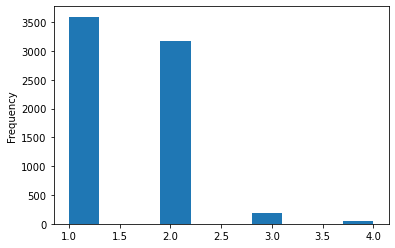

In [8]:
df['numero_produtos'].plot(kind = 'hist', bins = 10)
plt.show

Uma pequena quantidade de pessoas consomem 3 ou 4 produtos bancários. 

**Qual perfil dos Usuários que consomem 3 ou 4 produtos bancários?**

É interessante traçar esse perfil, uma vez que é possível fazer uma abordagem direcionada a clientes com perfis similares.

In [9]:
numero_produtos = df[df['numero_produtos']>=3]

In [10]:
(numero_produtos.shape[0]*100)/df.shape[0]

3.3285714285714287

Apenas 3,32% dos clientes da amostra consomem 3 ou 4 produtos bancários

In [11]:
num_prod = numero_produtos['genero'].value_counts()

In [12]:
num_prod[1]

93

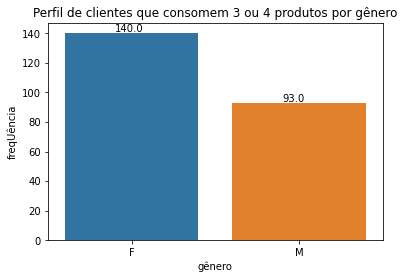

In [13]:
ax = sns.countplot(x='genero', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos por gênero')
plt.xlabel('gênero')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

In [14]:
numero_produtos.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,646.000000,44.055794,5.188841,78517.340773,3.180258,0.716738,0.433476
std,99.196513,9.946901,2.872049,62072.933649,0.385229,0.451552,0.496622
min,358.000000,22.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,582.000000,38.000000,3.000000,0.000000,3.000000,0.000000,0.000000
50%,647.000000,43.000000,5.000000,100337.960000,3.000000,1.000000,0.000000
75%,711.000000,51.000000,8.000000,128352.590000,3.000000,1.000000,1.000000
max,850.000000,77.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


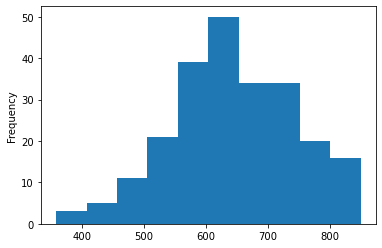

In [15]:
numero_produtos['pontuacao_credito'].plot(kind='hist', bins=10)
plt.show()

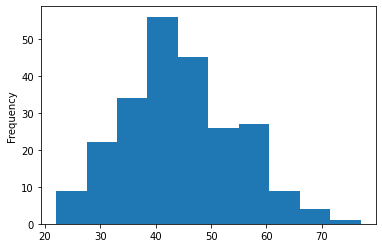

In [16]:
numero_produtos['idade'].plot(kind='hist', bins=10)
plt.show()

In [17]:
def dividindo_por_cadegoria(df, cut_points,labels,novo_nome,cat):
  df[novo_nome] = pd.cut(df[cat], cut_points, labels = labels)
  return df 

In [18]:
novo_nome = 'idade_categorias'
cat = 'idade'
cut_points = [18,31,41,61,100]
labels = ['18-30', '31-43','44-60','61-100']

df_idade = dividindo_por_cadegoria(numero_produtos,cut_points,labels, novo_nome,cat)

C:\Users\Usuario\Anaconda3\envs\aceleradev_2020\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_idade

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo,idade_categorias
2,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0,44-60
7,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0,18-30
30,c5f69b83c0ce118337d9d88b285dc25fbe8256ca,cc3f1d8b1c9dbe09e1306b672a295f43894a4994,591,RS,F,39,3,0.00,3,1,0,31-43
70,efb3b673ebdd3bb0d5e3f5dd6f399275b9394f9e,56dc6d9bc2ca0bee5a26fbc2b97f39a0de7b9434,738,PR,M,58,2,133745.44,4,1,0,44-60
88,1025275488300f6d71eded2eb82e40f40a6b1745,8822461f78f43469418f744326f58cb339db5c31,646,SC,F,46,4,0.00,3,1,0,44-60
...,...,...,...,...,...,...,...,...,...,...,...,...
6875,761f7a89101b6525c6fc2e28e6b24a3d8d6d5414,b085305714e946484f8966e7cf220320ae9d1443,610,SC,F,57,7,72092.95,4,0,1,44-60
6890,97bcc51a163cd8c6d5bc8cacdb0ef5a21730c3eb,b9164a85d362e10ae4ba2ecd6656769e02531dff,490,SC,M,39,1,0.00,3,1,0,31-43
6911,bbd2ce46a564b5b99a66cbdff26984e4fc01a13c,1612be660451cd8d0feaf216b7f0f368f30fd38b,705,PR,F,54,3,125889.30,3,1,0,44-60
6912,ea68e875029abc7cf85cc03f03371571278651e5,40fc87c0574b7baa7eecd7f7f12af2ad56909ebb,544,SC,M,48,10,78314.63,3,1,1,44-60


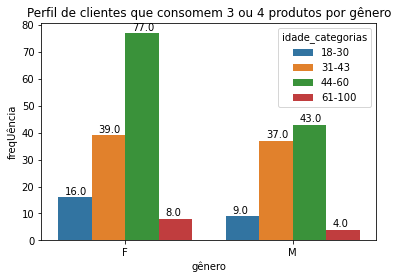

In [20]:
ax = sns.countplot(x='genero', hue='idade_categorias', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos por gênero')
plt.xlabel('gênero')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+1))

   33% dos clientes que mais consomem mais produtos bancários são mulheres com idade entre 44 - 60
   18% dos homens que consomem mais 3 ou 4 produtos bancários tem idade entre 44-60 anos

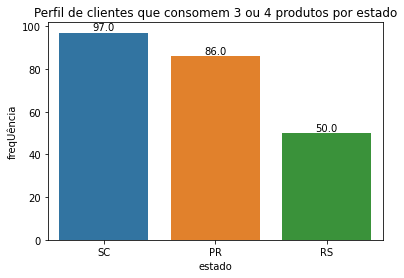

In [21]:
ax = sns.countplot(x='estado_residencia', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos por estado')
plt.xlabel('estado')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

As pessoas residentes no estado de Santa Catarina e Paraná tendem a consumir mais produtos bancários

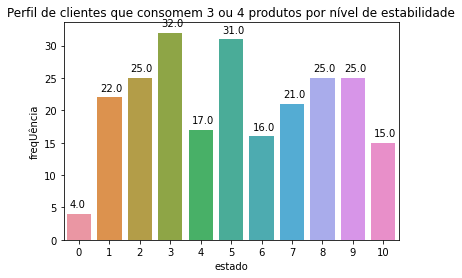

In [22]:
ax = sns.countplot(x='nivel_estabilidade', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos por nível de estabilidade')
plt.xlabel('estado')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

Clientes com nível de estabilidade 3 tendem a consumir 3 ou 4 produtos bancários, mas pelo gráfico percebemeos que existem quantidades significantes de clientes de todos os níveis de estabilidade consumindo 3 ou 4 produtos bancários.

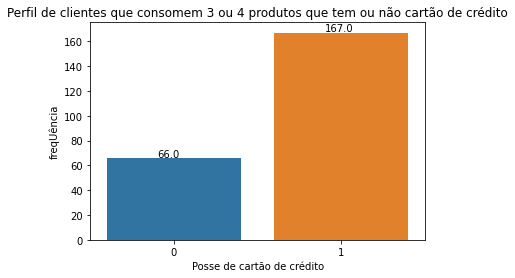

In [23]:
ax = sns.countplot(x='possui_cartao_de_credito', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos que tem ou não cartão de crédito')
plt.xlabel('Posse de cartão de crédito')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

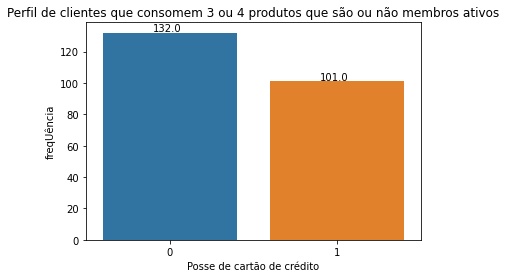

In [24]:
ax = sns.countplot(x='membro_ativo', data=numero_produtos)
plt.title('Perfil de clientes que consomem 3 ou 4 produtos que são ou não membros ativos')
plt.xlabel('Posse de cartão de crédito')
plt.ylabel('freqUência')

for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

## Conclusões
**Perfil de pessoas que consomem 3 ou 4 produtos bancários**

Pessoas que consomem 3 ou 4 produtos bancários tendem a ser mulheres com faixa etária entre 44 e 60 anos.
De uma maneira geral pessoas que consomem 3 ou 4 produtos bancários são moradoras de Santa Catarina ou Paraná, possuem cartão de crédito e não necessariamente são membros ativos.

**Pontos de reflexão para o negócio:**
- O que fazer para atrair mais homens a comprar produtos bancários?
- Como atrair pessoas de outras faixas etárias
- Como atuar no Rio Grande do Sul para maior aderência de produtos bancários.

## Análise baseada na pontuação de crédito

Quanto mais alto a pontuação de crédito, maiores são as chances de o cidadão honrar compromissos financeiros nos próximos 12 meses e ter acesso facilitado ao mercado de crédito. Por isso, as empresas podem usar a pontuação como uma informação adicional para a tomada de decisão no momento de concessão de financiamentos, além de suas próprias informações para compor sua política de crédito.

### Panorama Geral do perfil dos clientes presentes nesse dataset

In [25]:
quantidade_genero = pd.DataFrame(df['genero'].value_counts()).reset_index()
quantidade_genero

,index,genero
0,M,3791
1,F,3209


In [26]:
media_genero = df.groupby('genero').agg({'pontuacao_credito':np.mean}).reset_index()
media_genero

,genero,pontuacao_credito
0,F,648.607666
1,M,650.785281


In [27]:
media_genero = df.groupby('genero').agg({'pontuacao_credito':np.std}).reset_index()
media_genero

,genero,pontuacao_credito
0,F,97.274798
1,M,96.854033


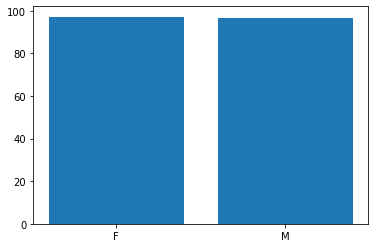

In [28]:
plt.bar(media_genero['genero'], media_genero['pontuacao_credito'])
for p in ax.patches:
    ax.annotate('{:2.1f}'.format(p.get_height()), (p.get_x()+0., p.get_height()+10))

In [33]:
df['pontuacao_credito'].mean()

649.787

In [34]:
df['pontuacao_credito'].median()

651.0

In [35]:
stats.skew(df['pontuacao_credito'])

-0.04682490988478742

In [36]:
stats.kurtosis(df['pontuacao_credito'])

-0.4634276897888494

**Os 25% das pessoas que tem maior pontuação de crédito possuem pontuação maior que 717**

Vamos analisar o perfil de pessoas que fazem parte desse grupo

In [37]:
pontuacao_alta = df[df['pontuacao_credito']>=717]

In [38]:
pontuacao_alta['genero'].value_counts()

M    977
F    785
Name: genero, dtype: int64

In [39]:
genero_media_alto = pontuacao_alta.groupby('genero').agg({'pontuacao_credito':np.mean}).reset_index()
genero_media_alto.columns = ['genero', 'media_pont_credito']
genero_media_alto

,genero,media_pont_credito
0,F,774.346497
1,M,773.067554


In [40]:
genero_std_alto = pontuacao_alta.groupby('genero').agg({'pontuacao_credito':np.std}).reset_index()
genero_std_alto.columns = ['genero', 'std_pont_credito']
genero_std_alto

,genero,std_pont_credito
0,F,40.970026
1,M,41.344806


In [41]:
df_F = df[df['genero']=='F']
df_M = df[df['genero']=='M']

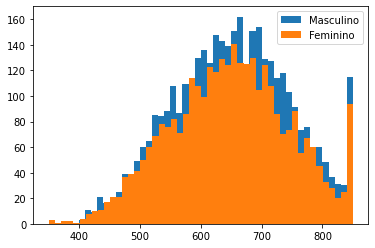

In [42]:
plt.hist(df_M['pontuacao_credito'], bins=50, label='Masculino')
plt.hist(df_F['pontuacao_credito'], bins=50 , label='Feminino')
plt.legend(loc='upper right')
plt.show()

In [43]:
stats.skew(df_F['pontuacao_credito'])

-0.05322413241762784

In [44]:
stats.skew(df_M['pontuacao_credito'])

-0.04108508445129862

Apesar da quantidade de homens com pontuação de crédito alta seja maior a média da pontuação de crédito entre as mulheres é maior. Isso indica que de uma maneira geral as mulheres tem uma pontuação de crédito mais alta. Esse inferência  pode ser mostrado com uma assimetria negativa maior do histograma referente as mulheres.

In [45]:
pontuacao_iq = df[df['pontuacao_credito']>=582]
pontuacao_iq = pontuacao_iq[pontuacao_iq['pontuacao_credito']<717]

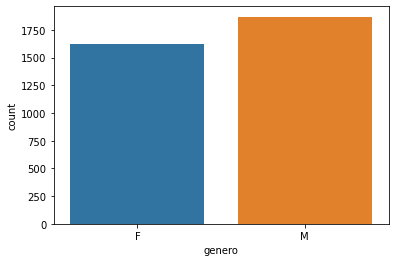

In [46]:
sns.countplot(x='genero', data=pontuacao_iq)
plt.show()

In [47]:
pontuacao_iq.groupby('genero').agg({'pontuacao_credito':np.mean})

,pontuacao_credito
genero,
F,650.038841
M,650.349385


In [48]:
pontuacao_baixo = df[df['pontuacao_credito']<582]

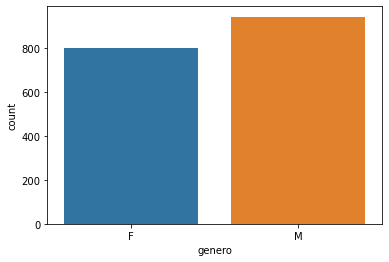

In [49]:
sns.countplot(x='genero', data=pontuacao_baixo)
plt.show()

In [50]:
pontuacao_baixo.groupby('genero').agg({'pontuacao_credito':np.mean})

,pontuacao_credito
genero,
F,522.639651
M,525.224339


In [51]:
df.groupby('estado_residencia')['pontuacao_credito'].mean()

estado_residencia
PR    648.961294
RS    651.105143
SC    649.537653
Name: pontuacao_credito, dtype: float64

In [52]:
def dividindo_por_cadegoria(df, cut_points,labels,novo_nome,cat):
  df[novo_nome] = pd.cut(df[cat], cut_points, labels = labels)
  return df 

novo_nome = 'idade_categorias'
cat = 'idade'
cut_points = [18,26,41,61,100]
labels = ['18-25', '26-40','41-60','61-100']

df_idade = dividindo_por_cadegoria(df,cut_points,labels, novo_nome,cat)

In [53]:
agrupado_idade = df.groupby('idade_categorias').agg({'pontuacao_credito':np.mean }).reset_index()
agrupado_idade

,idade_categorias,pontuacao_credito
0,18-25,651.302609
1,26-40,650.348298
2,41-60,647.477867
3,61-100,652.113475


In [54]:
agrupado_idade_genero = df.groupby(['idade_categorias','genero']).agg({'pontuacao_credito':np.mean}).reset_index()
agrupado_idade_genero

,idade_categorias,genero,pontuacao_credito
0,18-25,F,651.799257
1,18-25,M,650.866013
2,26-40,F,649.556588
3,26-40,M,650.974071
4,41-60,F,645.739444
5,41-60,M,649.137660
6,61-100,F,649.846715
7,61-100,M,654.255172


In [55]:
lista_contagem = []
l1 = df[df['idade']<25]['genero'].value_counts()

In [56]:
lista_contagem.append(l1[1])
lista_contagem.append(l1[0])

In [57]:
l1 = df[(df['idade']>=25) & (df['idade']<40)]['genero'].value_counts()

In [58]:
l1

M    2167
F    1688
Name: genero, dtype: int64

In [59]:
lista_contagem.append(l1[1])
lista_contagem.append(l1[0])

In [60]:
l1 = df[(df['idade']>=40) & (df['idade']<60)]['genero'].value_counts()

In [61]:
l1

M    1260
F    1195
Name: genero, dtype: int64

In [62]:
lista_contagem.append(l1[1])
lista_contagem.append(l1[0])

In [63]:
l1 = df[(df['idade']>=60)]['genero'].value_counts()

In [64]:
l1

M    187
F    173
Name: genero, dtype: int64

In [65]:
lista_contagem.append(l1[1])
lista_contagem.append(l1[0])

In [66]:
lista_contagem

[153, 177, 1688, 2167, 1195, 1260, 173, 187]

In [67]:
agrupado_idade_genero['quantidade por genero'] = lista_contagem

In [68]:
agrupado_idade_genero

,idade_categorias,genero,pontuacao_credito,quantidade por genero
0,18-25,F,651.799257,153
1,18-25,M,650.866013,177
2,26-40,F,649.556588,1688
3,26-40,M,650.974071,2167
4,41-60,F,645.739444,1195
5,41-60,M,649.137660,1260
6,61-100,F,649.846715,173
7,61-100,M,654.255172,187


In [69]:
alista_contagem = []
l1 = df[(df['idade']>=25) & (df['idade']<40)]['genero'].value_counts()

In [70]:
lista_contagem = [l1[1], l1[0]]

In [71]:
lista_contagem

[1688, 2167]

In [72]:
l1 = df[df['pontuacao_credito']<582]['genero'].value_counts()

In [73]:
df_aux = df[df['pontuacao_credito']>582]
df_aux = df[df['pontuacao_credito']>582]

In [74]:
df['estado_residencia'].unique()

array(['SC', 'RS', 'PR'], dtype=object)

In [75]:
df.groupby('estado_residencia')['pontuacao_credito'].median()

estado_residencia
PR    650
RS    650
SC    653
Name: pontuacao_credito, dtype: int64

In [76]:
df.groupby('estado_residencia').agg{}['pontuacao_credito'].stats.mode()

SyntaxError: invalid syntax (<ipython-input-76-3634752e8d35>, line 1)

In [77]:
resumo_pontuacao_estado = df.groupby('estado_residencia').agg({'pontuacao_credito': [stats.mode,np.median, np.mean, np.std]})
resumo_pontuacao_estado

pontuacao_credito                              
                               mode median        mean        std
estado_residencia                                                
PR                    ([850], [47])    650  648.961294  98.607186
RS                    ([850], [42])    650  651.105143  95.136598
SC                    ([850], [78])    653  649.537653  97.233493

In [78]:
resumo_pontuacao_estado.columns

MultiIndex([('pontuacao_credito',   'mode'),
            ('pontuacao_credito', 'median'),
            ('pontuacao_credito',   'mean'),
            ('pontuacao_credito',    'std')],
           )

In [79]:
resumo_pontuacao_estado[('pontuacao_credito',   'mode')]

estado_residencia
PR    ([850], [47])
RS    ([850], [42])
SC    ([850], [78])
Name: (pontuacao_credito, mode), dtype: object

In [98]:
resumo_pontuacao_por_estados = df.groupby('estado_residencia').agg({'pontuacao_credito': [np.mean, np.std, np.median, pd.Series.mode]})
resumo_pontuacao_por_estados.columns = ['media', 'desvio_padrao', 'mediana', 'moda']
resumo_pontuacao_por_estados = resumo_pontuacao_por_estados
resumo_pontuacao_por_estados.apply(lambda x : round(x,2))
resumo_pontuacao_por_estados

,media,desvio_padrao,mediana,moda
estado_residencia,,,,
PR,648.961294,98.607186,650,850
RS,651.105143,95.136598,650,850
SC,649.537653,97.233493,653,850


In [99]:
submission = resumo_pontuacao_por_estados
submission.to_json('submission.json',orient = 'index')

In [100]:
pd.read_json(r'C:\Users\Usuario\codenation\coestatistica-1\submission.json')

,PR,RS,SC
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493
mediana,650.000000,650.000000,653.000000
moda,850.000000,850.000000,850.000000
